In [3]:
import os.path

import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from tqdm import tqdm

from soma.generators.age import AgeGenerator
from soma.util.errors import compute_errors
from soma.tests.som import som_test

plt.style.use('seaborn')
plt.style.use('seaborn-paper')

In [4]:
brackets = [
    # First one repeated for cross-checking ("error" type 2 should be high)
    (15, 20), (15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50)
]
compare = list(zip(brackets[:-1], brackets[1:]))

In [7]:
if os.path.exists('../results/age_errors.csv'):
    print('Continue!')
    results = pandas.read_csv('../results/age_errors.csv', index_col=0)
else:
    results = DataFrame(columns=['error1', 'error2', 'time'], index=map(str, compare))

for ba, bb in compare:
    if results.loc[str((ba, bb))]['time'] > 0:
        print(f'Skipping {ba} {bb}')
        continue
    print(f'Running {ba} {bb}')
    gen_a = AgeGenerator(*ba)
    gen_b = AgeGenerator(*bb)
    results.loc[str((ba, bb))].loc[:] = compute_errors(gen_a, gen_b, som_test, alpha=0.001, samples=500, repeat=500,
                                                       return_duration=True)
    results.to_csv('../results/age_errors.csv')

Continue!
Skipping (15, 20) (15, 20)
Skipping (15, 20) (20, 25)
Running (20, 25) (25, 30)


KeyboardInterrupt: 

In [92]:
results

,error1,error2,time
"((15, 20), (15, 20))",0.0,1.0,1.814923
"((15, 20), (20, 25))",0.0,0.0,1.810933
"((20, 25), (25, 30))",0.0,0.0,1.769004
"((25, 30), (30, 35))",0.0,0.0,1.77182
"((30, 35), (35, 40))",0.0,0.5,1.532741
"((35, 40), (40, 45))",0.0,1.0,1.960569
"((40, 45), (45, 50))",0.0,1.0,2.083811


# Visualization

In [64]:
gen_15_20 = AgeGenerator(15, 20)
gen_20_25 = AgeGenerator(20, 25)

g1520, g1520_age = gen_15_20.sample_with_age(10000)
g2025, g2025_age = gen_20_25.sample_with_age(10000)

In [65]:
p, som, (c15_20, c20_25) = som_test(g1520, g2025, (50,50),ret_som=True, ret_counts=True)
p

0.0

In [66]:
som.get_surface_state()
bmus = som.get_bmus(som.activation_map)

In [67]:
all_ages = np.concatenate([g1520_age, g2025_age])
image = np.zeros_like(c15_20, dtype=float)
count = np.zeros_like(c15_20, dtype=int)
for i in range(len(bmus)):
    x,y = bmus[i]
    image[x,y] += all_ages[i]
    count[x,y] += 1
image /= count

/tmp/ipykernel_94794/2197713141.py:8: RuntimeWarning: invalid value encountered in true_divide
  image /= count


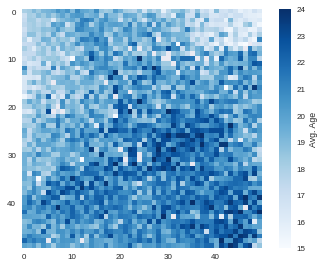

In [86]:
plt.figure()
plt.imshow(image, cmap='Blues')
plt.colorbar(label='Avg. Age')
plt.grid(False)
plt.savefig(os.path.expanduser('~/Plots/age_avg.eps'), bbox_inches='tight')

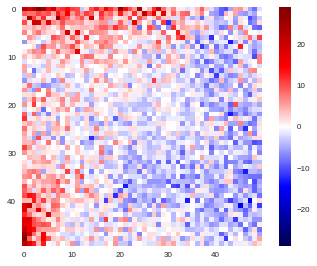

In [84]:
delta = c15_20 - c20_25
plt.imshow(delta, cmap='seismic', vmin=-np.abs(delta).max(), vmax=np.abs(delta).max())
plt.colorbar()
plt.grid(False)
plt.savefig(os.path.expanduser('~/Plots/age_map.eps'), bbox_inches='tight')